In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import Connection

In [2]:
with Connection() as connection:
    age_groups_df = pd.read_sql('SELECT * FROM "TUKGRP2"."EX3_AGEGROUPS"', connection)
age_groups_df

,AGEGROUP,AVGVISITS,MINVISITS,MAXVISITS,MEDIANVISITS
0,2,10.163461,2,92,7
1,3,11.148331,1,104,8
2,4,11.146517,1,218,7
3,5,11.945614,1,252,8
4,6,13.010355,1,260,9
5,7,13.399787,3,275,9
6,8,13.351435,1,130,10
7,9,15.833333,1,136,12
8,10,14.871794,3,41,11


/usr/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0424893393290234e-20 / 1.1102230246251565e-16
  RuntimeWarning)


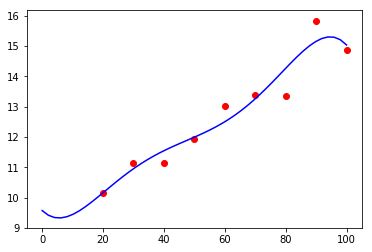

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 5
interpolation_model = make_pipeline(PolynomialFeatures(degree), Ridge())

x = age_groups_df['AGEGROUP'] * 10
y = age_groups_df['AVGVISITS']
X = x[:, np.newaxis]

x_plot = np.linspace(0, 100)
X_plot = x_plot[:, np.newaxis]

interpolation_model.fit(X, y)
y_plot = interpolation_model.predict(X_plot)

plt.scatter(x, y, color='red')
plt.plot(x_plot, y_plot, color='blue')
plt.show()

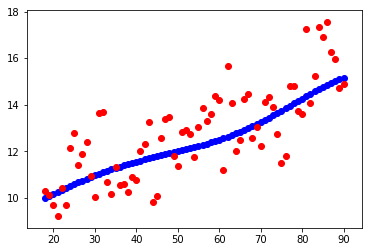

In [4]:
with Connection() as connection:
    avg_visits_per_age_df = pd.read_sql('SELECT * FROM "TUKGRP2"."EX3_AVG_VISITS_PER_AGE"', connection)
ages = avg_visits_per_age_df['AGE']
avg_visits_actual = avg_visits_per_age_df['AVGVISITS']
avg_visits_prediction = interpolation_model.predict(ages[:, np.newaxis])

plt.scatter(ages, avg_visits_prediction, color='blue')
plt.scatter(ages, avg_visits_actual, color='red')
plt.show()

In [5]:
from sklearn.metrics import r2_score

print('R2: {}'.format(r2_score(avg_visits_actual, avg_visits_prediction)))

R2: 0.5629363214771319
